In [ ]:
# text processing of Sunak's 2021 budget session speech

In [84]:
# read the file
file = "budget-speech-2021.txt"
with open(file, 'r') as f:
    lines = f.readlines()

# remove end-of-line and empty lines
lines = [l.strip() for l in lines]
lines = list(filter(lambda l: (l != ''), lines))  

In [85]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

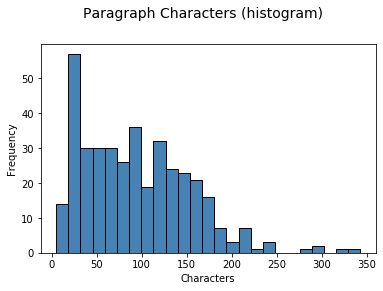

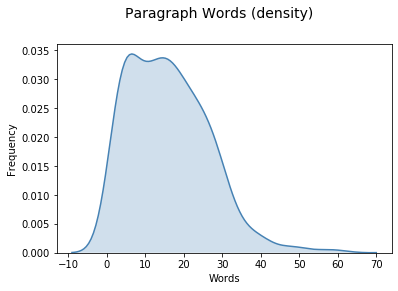

In [86]:
# historam
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Paragraph Characters (histogram)", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Characters")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist([len(l) for l in lines], color='steelblue', bins=25,
                                    edgecolor='black', linewidth=1)

# density plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Paragraph Words (density)", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Words")
ax1.set_ylabel("Frequency") 
sns.kdeplot([len(l.split(" ")) for l in lines], ax=ax1, shade=True, color='steelblue')

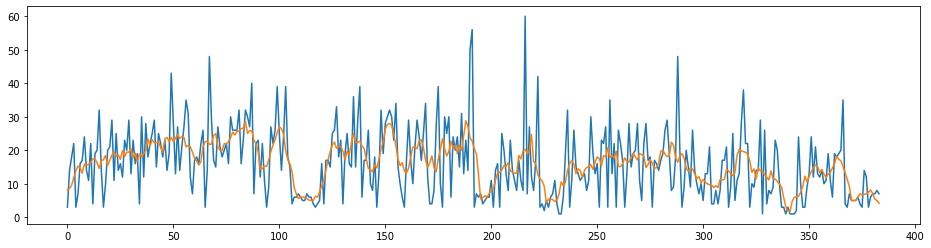

In [89]:
# word count along time axis

fig = plt.figure(figsize = (16,4))
ax = plt.axes()

x = range(len(lines))
y = [len(l.split(" ")) for l in lines]

ax.plot(x, y);

def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
y1 = movingaverage(y, 7)
ax.plot(x, y1);

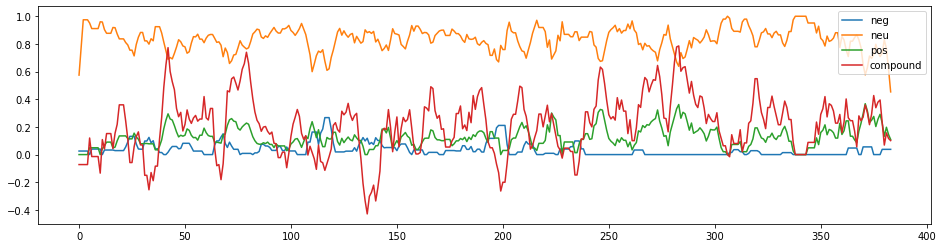

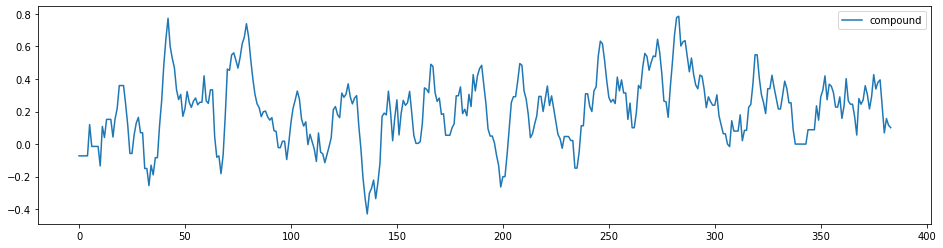

In [117]:
# nltk
from nltk import tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
fields = ["neg", "neu", "pos", "compound"]
polarity = {f:[] for f in fields}
for l in lines:
    vs = analyzer.polarity_scores(l)
    for f in fields:
        polarity[f].append(vs[f])

        
fig = plt.figure(figsize = (16,4))
ax = plt.axes()
x = range(len(lines))
for f in fields:
    y = movingaverage(polarity[f], 5)
    ax.plot(x, y, label=f);
ax.legend(loc='upper right')


fig = plt.figure(figsize = (16,4))
ax = plt.axes()
x = range(len(lines))
y = movingaverage(polarity["compound"], 5)
ax.plot(x, y, label="compound");
ax.legend(loc='upper right')



In [120]:
import json

data = []
i = 0
for l in lines:
    data.append({"line": l, "x": x[i], "y": y[i]})
    i = i + 1

print(json.dumps(data))

[{"line": "Madam Deputy Speaker,", "x": 0, "y": -0.07224000000000001}, {"line": "A year ago, in my first Budget, I announced our initial response to coronavirus.", "x": 1, "y": -0.07224000000000001}, {"line": "What was originally thought to be a temporary disruption to our way of life has fundamentally altered it.", "x": 2, "y": -0.07224000000000001}, {"line": "People are still being told to stay in their homes; businesses have been ordered to close; thousands of people are in hospital.", "x": 3, "y": -0.07224000000000001}, {"line": "Much has changed.", "x": 4, "y": -0.07224000000000001}, {"line": "But one thing has stayed the same.", "x": 5, "y": 0.11988000000000001}, {"line": "I said I would do whatever it takes; I have done; and I will do so.", "x": 6, "y": -0.014219999999999983}, {"line": "We have announced over \u00a3280 billion of support, protecting jobs, keeping businesses afloat, helping families get by.", "x": 7, "y": -0.014219999999999983}, {"line": "Despite this unprecedent

In [123]:
# eventually used codepen to display using a D3 graph
# https://codepen.io/dror27/full/bGBPRpe

from IPython.display import IFrame
IFrame('https://codepen.io/dror27/full/bGBPRpe', width=1000, height=800)